# <b>Подготовка</b>

## Начало

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [36]:
df = pd.read_csv('vacancies_2024.csv')
df

C:\Users\PC-1\AppData\Local\Temp\ipykernel_9152\17425615.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vacancies_2024.csv')


,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
0,SAP R/3 functional consultant,NaN,NaN,NaN,NaN,Москва,2003-01-24T21:30:49+0300
1,Broadcast encryption engineer,NaN,NaN,2000.0,USD,Южная Корея,2003-01-31T18:24:11+0300
2,Embedded OS engineering manager,NaN,NaN,2000.0,USD,Москва,2003-01-31T18:25:43+0300
3,Coordinator on Intellectual Property Projects,NaN,NaN,NaN,NaN,Москва,2003-02-12T10:40:50+0300
4,Outsourcing Projects Coordinator,NaN,NaN,NaN,NaN,Москва,2003-02-14T16:31:06+0300
...,...,...,...,...,...,...,...
6915292,Дизайнер UX/UI,Adobe Photoshop\nAdobe Illustrator\nПодготовка...,130000.0,NaN,RUR,Москва,2024-11-30T12:32:11+0300
6915293,Руководитель по развитию перспективных проекто...,NaN,NaN,NaN,NaN,Москва,2024-11-30T12:29:40+0300
6915294,Tech Lead Node.js (Backend разработчик/руковод...,Git\nNode.js\nTypeScript\nJavaScript\nPostgreS...,250000.0,NaN,RUR,Санкт-Петербург,2024-11-30T22:29:02+0300
6915295,Специалист голосовой поддержки водителей со зн...,Телефонные переговоры\nРабота с большим объемо...,NaN,NaN,NaN,Джизак,2024-11-30T10:07:58+0300


## Курс валют 

In [37]:
import requests
import xml.etree.ElementTree as ET
from datetime import datetime, timedelta


BASE_URL = "http://www.cbr.ru/scripts/XML_daily.asp"

salary_currencies = {
    "BYR": "R01090",
    "USD": "R01235",
    "EUR": "R01239",
    "KZT": "R01335",
    "UAH": "R01720",
    "AZN": "R01020A",
    "KGS": "R01370",
    "UZS": "R01717",
    "GEL": "R01210",
}

start_date = datetime(2003, 1, 1)
end_date = datetime(2024, 11, 1)

current_date = start_date
dates = []
while current_date <= end_date:
    dates.append(current_date.strftime("%d/%m/%Y"))
    current_date += timedelta(days=32)
    current_date = current_date.replace(day=1)


def get_currency_rate(date):
    params = {"date_req": date}
    response = requests.get(BASE_URL, params=params)

    root = ET.fromstring(response.content)
    rowForDf = {"date": date}
    
    for valute in root.findall("Valute"):
        char_code = valute.find("CharCode").text
        vunitRate = valute.find("VunitRate").text 

        if char_code in salary_currencies.keys(): 
            rowForDf[char_code] = vunitRate.replace(",", ".")
            
    return rowForDf


all_data = []
for date in dates:
    rowForDf = get_currency_rate(date)
    all_data.append(rowForDf)

columns = ["date", "BYR", "USD", "EUR", "KZT", "UAH", "AZN", "KGS", "UZS", "GEL"]
currency_df = pd.DataFrame(all_data, columns=columns)

currency_df['date'] = pd.to_datetime(currency_df['date'], format="%d/%m/%Y").dt.strftime("%Y-%m")
currency_df.to_csv("currency.csv", index=False, encoding="utf-8")


## Фильтрация вакансий

In [38]:
#web developer ключевые слова:
keywords = [
    'web develop', 'веб разработчик', 'web разработчик', 'web programmer', 'web программист', 'веб программист', 
    'битрикс разработчик', 'bitrix разработчик', 'битрикс девелопер', 'drupal разработчик', 'cms разработчик', 
    'wordpress разработчик', 'wp разработчик', 'joomla', 'drupal developer', 'cms developer', 'wordpress developer', 
    'wp developer', 'joomla developer', 'frontend developer', 'backend developer', 'fullstack developer', 
    'фронтенд разработчик', 'бекенд разработчик', 'фулстек разработчик', 'frontend engineer', 'backend engineer', 
    'fullstack engineer', 'front-end developer', 'back-end developer', 'full-stack developer', 'front-end engineer', 
    'back-end engineer', 'full-stack engineer', 'веб инженер', 'site developer', 'сайт разработчик', 
    'разработчик сайтов', 'developer web', 'web engineer', 
    'php developer', 'php разработчик', 'python веб разработчик', 'node.js developer', 'node.js разработчик', 
    'javascript developer', 'javascript разработчик', 'typescript developer', 'typescript разработчик', 
    'vue.js developer', 'vue.js разработчик', 'react developer', 'react разработчик', 
    'angular developer', 'angular разработчик', 'django developer', 'django разработчик', 
    'джанго разработчик', 'flask developer', 'flask разработчик', 'ларевел разработчик', 
    'laravel developer', 'laravel разработчик', 'symfony developer', 'symfony разработчик', 
    'саймфони разработчик', 'ruby on rails developer', 'ruby разработчик', 'rails developer', 
    'ror developer', 'ruby on rails разработчик', 'рубивонрейлс разработчик', 'react.js разработчик', 
    'react.js developer', 'next.js developer', 'next.js разработчик'
]

keywords_pattern = '|'.join(keywords)

In [39]:
filtred_df = df[df['name'].str.contains(keywords_pattern, case=False)]
filtred_df

,name,key_skills,salary_from,salary_to,salary_currency,area_name,published_at
168,Web Developer,NaN,NaN,NaN,NaN,Санкт-Петербург,2003-08-26T00:00:00+0400
700,Веб программист (Java),NaN,NaN,1500.0,USD,Москва,2003-10-06T00:00:00+0400
2154,WEB программист,NaN,NaN,700.0,USD,Москва,2004-01-14T00:00:00+0300
2287,Web программист (HTML/ASP),NaN,NaN,1000.0,USD,Москва,2004-01-20T17:09:32+0300
3176,WEB программист,NaN,NaN,1000.0,USD,Москва,2004-03-10T00:00:00+0300
...,...,...,...,...,...,...,...
6915116,PHP разработчик (Yii2),NaN,NaN,NaN,NaN,Москва,2024-11-29T11:41:38+0300
6915140,React Native / React.js developer,React Native\nReact\nАдаптивная верстка\nАнгли...,1500.0,3000.0,USD,Минск,2024-11-29T22:31:51+0300
6915200,WordPress разработчик,Wordpress\nFigma,NaN,NaN,NaN,Ташкент,2024-11-30T15:23:30+0300
6915220,Middle Full-stack Developer,Python\nGit\nDocker\nLinux\nPostgreSQL\nDjango...,NaN,NaN,NaN,Актобе,2024-11-30T12:41:24+0300


## Перевод деняг

In [40]:
from datetime import datetime

df_currency = pd.read_csv('currency.csv', index_col='date')


def convert_to_rur(salary, salary_currency, published_at):
    if pd.isna(salary): 
        return None
    if salary_currency == 'RUR':
        return salary
    
    date = datetime.fromisoformat(published_at)
    date = date.strftime("%Y-%m")

    rate_that_day = df_currency.loc[date]
    
    if salary_currency in df_currency.columns:
        return salary * rate_that_day[salary_currency]


def get_avg_salary(salary_from, salary_to):
    if pd.isna(salary_from) and pd.isna(salary_to):
        return None
    elif pd.isna(salary_from):
        return salary_to
    elif pd.isna(salary_to):
        return salary_from
    else:
        return (salary_from + salary_to) / 2
    

filtred_df['salary'] = filtred_df.apply(lambda row: get_avg_salary(row['salary_from'], row['salary_to']), axis=1)
filtred_df['salary'] = filtred_df.apply(lambda row: convert_to_rur(row['salary'], row['salary_currency'], row['published_at']), axis=1)
# csv_merged = csv_merged.dropna(subset=['salary'])
csv_merged = filtred_df[['name', 'key_skills','salary', 'area_name', 'published_at']]

csv_merged

C:\Users\PC-1\AppData\Local\Temp\ipykernel_9152\3808020099.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_df['salary'] = filtred_df.apply(lambda row: get_avg_salary(row['salary_from'], row['salary_to']), axis=1)
C:\Users\PC-1\AppData\Local\Temp\ipykernel_9152\3808020099.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_df['salary'] = filtred_df.apply(lambda row: convert_to_rur(row['salary'], row['salary_currency'], row['published_at']), axis=1)


,name,key_skills,salary,area_name,published_at
168,Web Developer,NaN,NaN,Санкт-Петербург,2003-08-26T00:00:00+0400
700,Веб программист (Java),NaN,45921.30,Москва,2003-10-06T00:00:00+0400
2154,WEB программист,NaN,20618.15,Москва,2004-01-14T00:00:00+0300
2287,Web программист (HTML/ASP),NaN,29454.50,Москва,2004-01-20T17:09:32+0300
3176,WEB программист,NaN,28515.60,Москва,2004-03-10T00:00:00+0300
...,...,...,...,...,...
6915116,PHP разработчик (Yii2),NaN,NaN,Москва,2024-11-29T11:41:38+0300
6915140,React Native / React.js developer,React Native\nReact\nАдаптивная верстка\nАнгли...,218300.85,Минск,2024-11-29T22:31:51+0300
6915200,WordPress разработчик,Wordpress\nFigma,NaN,Ташкент,2024-11-30T15:23:30+0300
6915220,Middle Full-stack Developer,Python\nGit\nDocker\nLinux\nPostgreSQL\nDjango...,NaN,Актобе,2024-11-30T12:41:24+0300


## Еще фильтрации(-ия)

In [ ]:
# Зарплата меньше 10 млн
filtred_df = csv_merged[(csv_merged['salary'] < 10_000_000) | (csv_merged['salary'].isna())]

# доля вакансий города больше или равно 2 процента от общего  городов
vacancies_count_by_city = filtred_df['area_name'].value_counts()
vacancies_share = vacancies_count_by_city / filtred_df.shape[0]

significant_cities = vacancies_share[vacancies_share >= 0.02].index
filtered_df = filtred_df[filtred_df['area_name'].isin(significant_cities)]


filtered_df

,name,key_skills,salary,area_name,published_at
168,Web Developer,NaN,NaN,Санкт-Петербург,2003-08-26T00:00:00+0400
700,Веб программист (Java),NaN,45921.30,Москва,2003-10-06T00:00:00+0400
2154,WEB программист,NaN,20618.15,Москва,2004-01-14T00:00:00+0300
2287,Web программист (HTML/ASP),NaN,29454.50,Москва,2004-01-20T17:09:32+0300
3176,WEB программист,NaN,28515.60,Москва,2004-03-10T00:00:00+0300
...,...,...,...,...,...
6914949,Ruby on Rails разработчик (middle/middle+),Ruby On Rails\nPostgreSQL\nRuby\nBackend\nRedi...,240000.00,Москва,2024-11-29T19:23:50+0300
6914997,Senior Backend Developer (Java),Java\nPostgreSQL\nDocker\nМикросервисная архит...,NaN,Москва,2024-11-29T16:09:11+0300
6915116,PHP разработчик (Yii2),NaN,NaN,Москва,2024-11-29T11:41:38+0300
6915140,React Native / React.js developer,React Native\nReact\nАдаптивная верстка\nАнгли...,218300.85,Минск,2024-11-29T22:31:51+0300


## Сохранение в отдельный файл

In [90]:
filtred_df.to_csv("filtred_df.csv", index=False, encoding="utf-8")

# <b>Страница «Общая статистика»</b>

## Динамика уровня зарплат по годам

C:\Users\PC-1\AppData\Local\Temp\ipykernel_9152\3437126575.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['published_at'] = pd.to_datetime(df['published_at'])


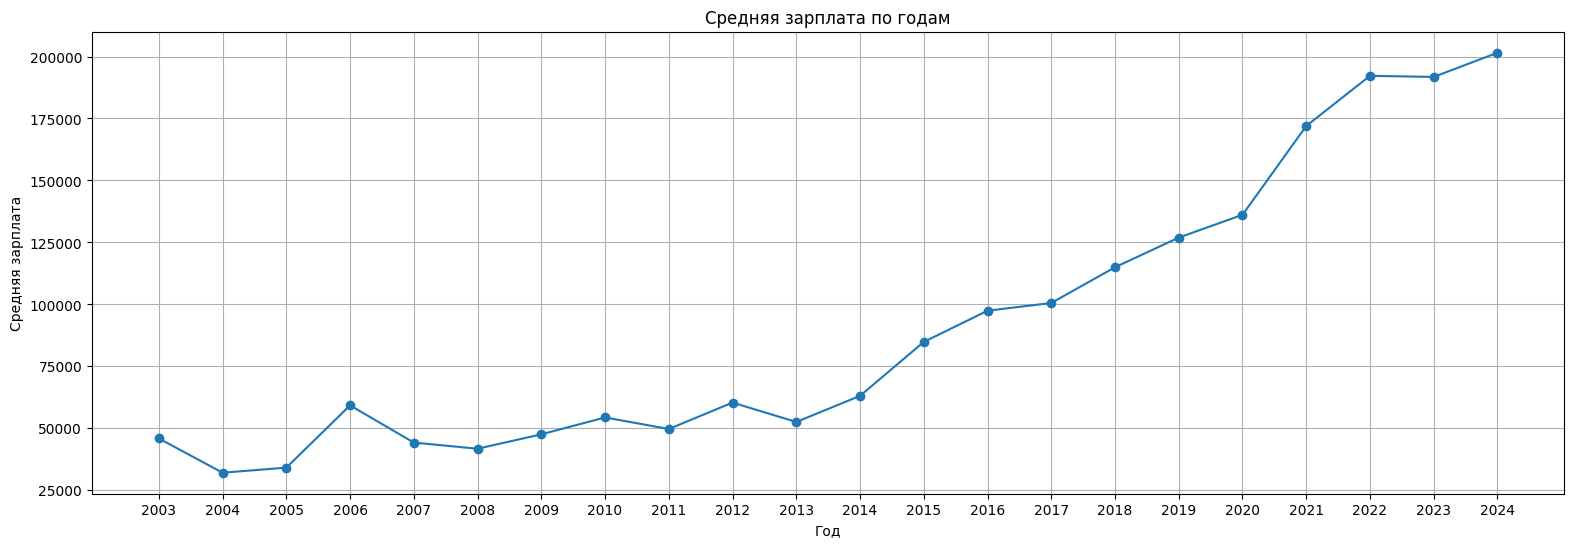

In [122]:
df = pd.read_csv('filtred_df.csv')

df['published_at'] = pd.to_datetime(df['published_at'])

df['year'] = df['published_at'].apply(lambda x: str(x)[:4])

average_salary_by_year = df.groupby('year')['salary'].mean()



plt.figure(figsize=(19, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year.values, marker='o')
plt.xlabel('Год')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата по годам')
plt.grid(True)
plt.show()

In [92]:
average_salary_by_year.to_dict()

{'2003': 45921.3,
 '2004': 32095.162666666667,
 '2005': 34143.12926470588,
 '2006': 59260.051659062505,
 '2007': 44253.26642836134,
 '2008': 41774.6424561194,
 '2009': 47582.0645,
 '2010': 54389.365234256926,
 '2011': 49732.60205239666,
 '2012': 60382.55932647313,
 '2013': 52571.99528229611,
 '2014': 63107.07403528452,
 '2015': 84850.49270782499,
 '2016': 97452.62475710793,
 '2017': 100562.82506790628,
 '2018': 114979.06079267779,
 '2019': 126945.4573094533,
 '2020': 136135.92892041907,
 '2021': 171969.79641372437,
 '2022': 192210.38932612567,
 '2023': 191765.0944131373,
 '2024': 201526.36355900305}

## Динамика количества вакансий по годам

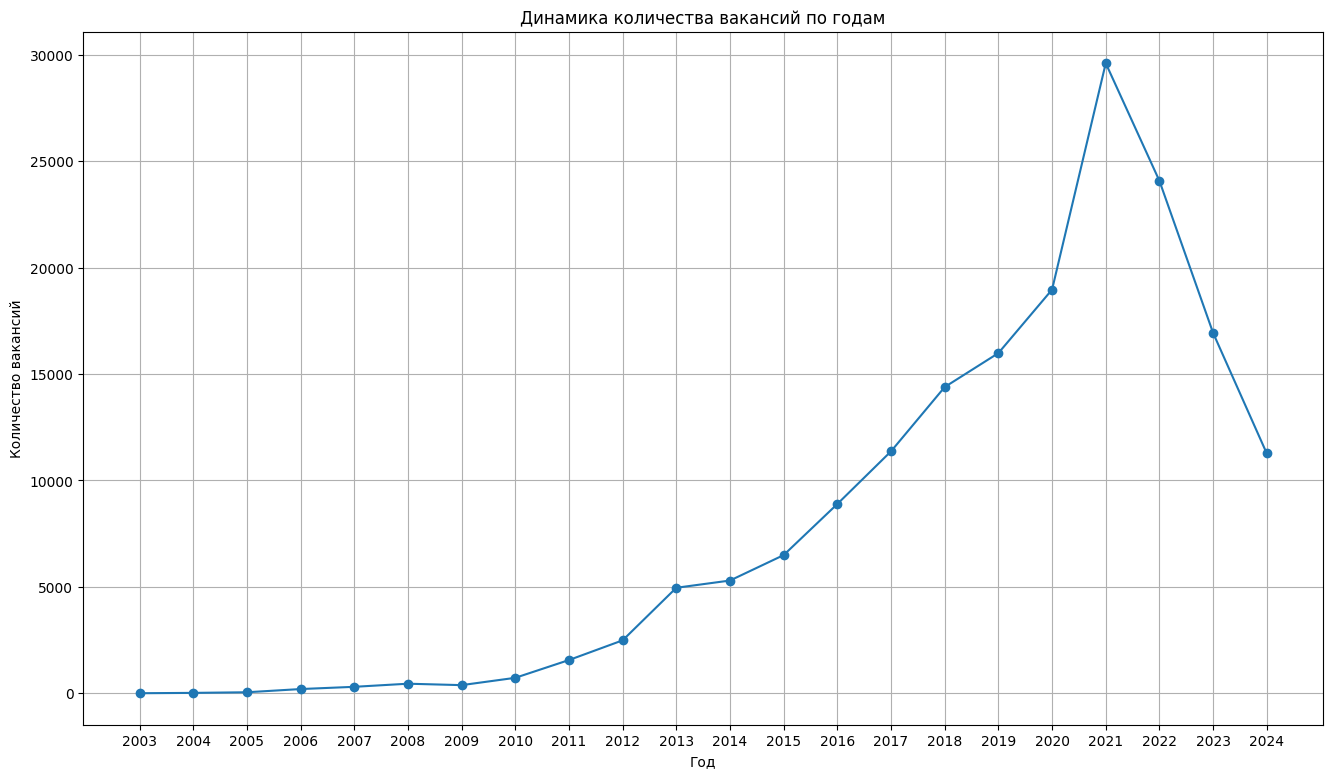

In [93]:
vacancies_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(16, 9))
plt.plot(vacancies_by_year.index, vacancies_by_year.values, marker='o')
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.title('Динамика количества вакансий по годам')
plt.grid(True)
plt.show()

In [94]:
vacancies_by_year.to_dict()

{'2003': 2,
 '2004': 18,
 '2005': 47,
 '2006': 198,
 '2007': 303,
 '2008': 449,
 '2009': 382,
 '2010': 726,
 '2011': 1561,
 '2012': 2487,
 '2013': 4957,
 '2014': 5297,
 '2015': 6493,
 '2016': 8894,
 '2017': 11369,
 '2018': 14389,
 '2019': 15984,
 '2020': 18967,
 '2021': 29605,
 '2022': 24077,
 '2023': 16931,
 '2024': 11267}

## Уровень зарплат по городам

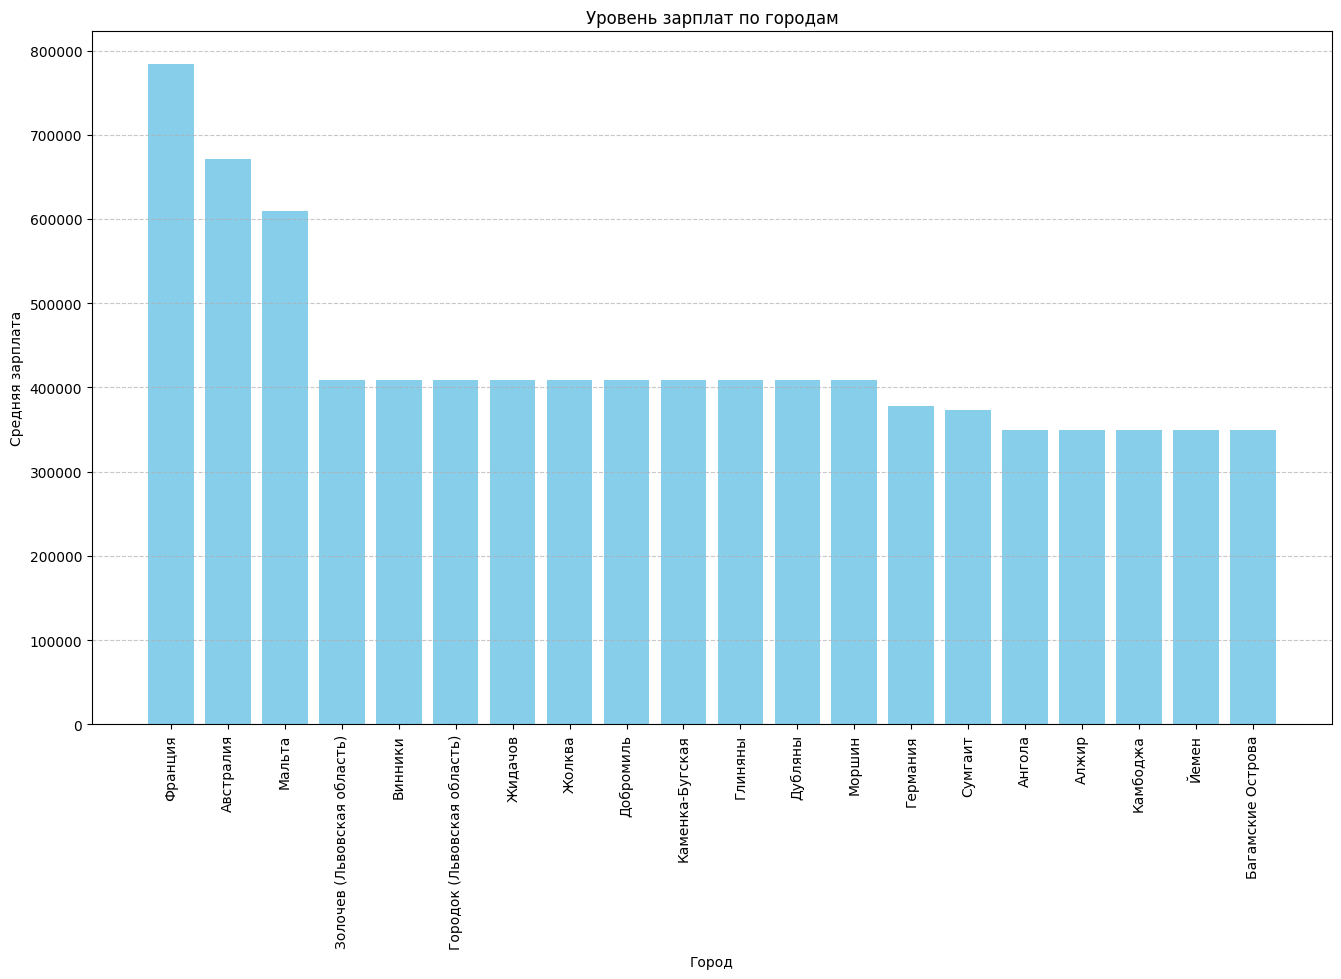

In [99]:
average_salary_by_city = df.groupby('area_name')['salary'].mean().sort_values(ascending=False)[0:20]


plt.figure(figsize=(16, 9))
plt.bar(average_salary_by_city.index, average_salary_by_city.values, color='skyblue')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата')
plt.title('Уровень зарплат по городам')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [96]:
average_salary_by_city.to_dict()

{'Франция': 783579.0,
 'Австралия': 670750.6033333334,
 'Мальта': 609107.1078125,
 'Золочев (Львовская область)': 409405.15,
 'Винники': 409405.15,
 'Городок (Львовская область)': 409405.15,
 'Жидачов': 409405.15,
 'Жолква': 409405.15,
 'Добромиль': 409405.15,
 'Каменка-Бугская': 409405.15,
 'Глиняны': 409405.15,
 'Дубляны': 409405.15,
 'Моршин': 409405.15,
 'Германия': 378282.63486197917,
 'Сумгаит': 373718.31,
 'Ангола': 350000.0,
 'Алжир': 350000.0,
 'Камбоджа': 350000.0,
 'Йемен': 350000.0,
 'Багамские Острова': 350000.0}

## Доля вакансий по городам

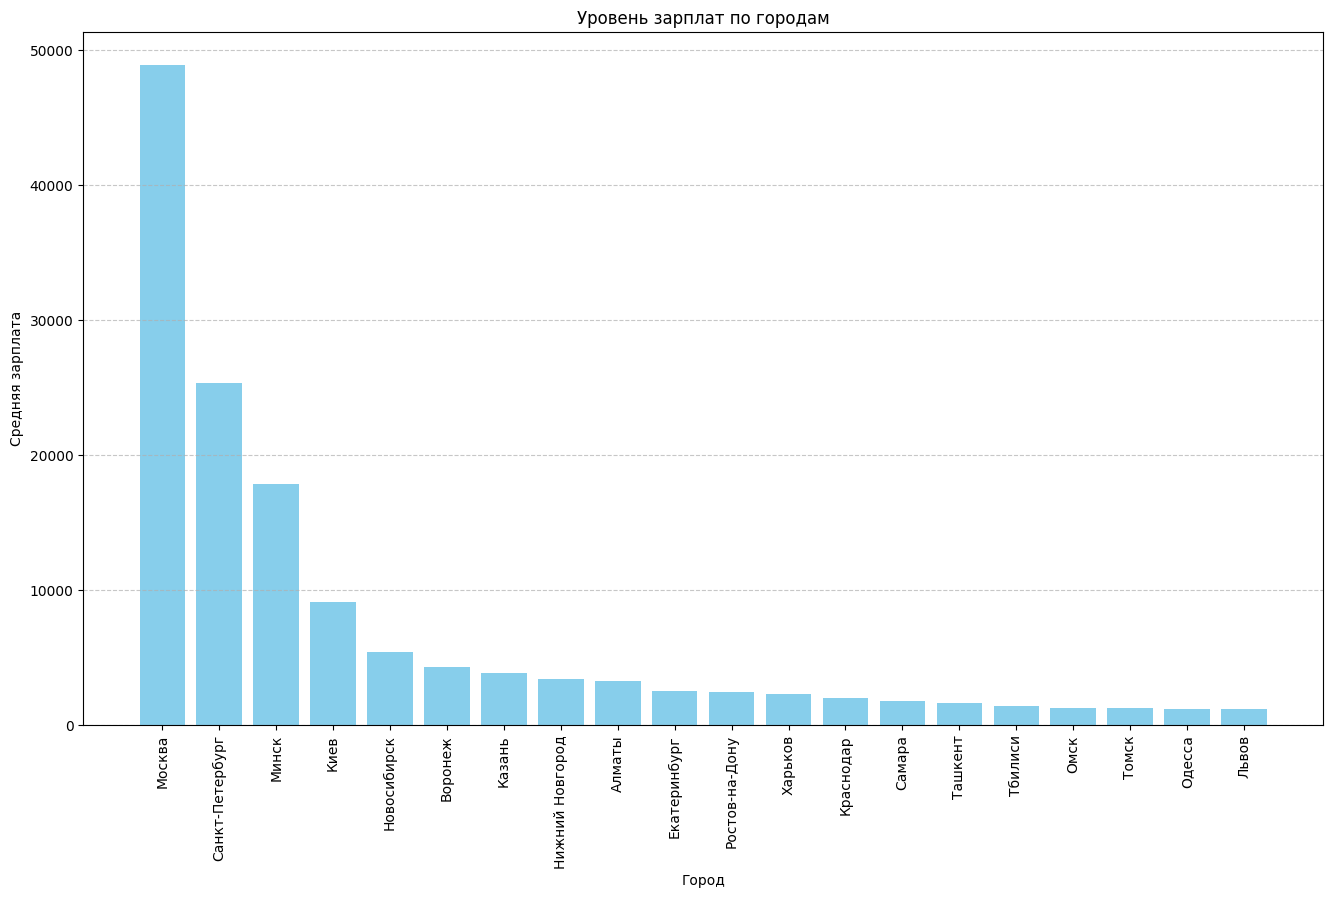

In [97]:
average_vacancies_count_by_city  = df['area_name'].value_counts().sort_index().sort_values(ascending=False)[0:20]

plt.figure(figsize=(16, 9))
plt.bar(average_vacancies_count_by_city.index, average_vacancies_count_by_city.values, color='skyblue')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата')
plt.title('Уровень зарплат по городам')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [98]:
average_vacancies_count_by_city.to_dict()

{'Москва': 48911,
 'Санкт-Петербург': 25333,
 'Минск': 17822,
 'Киев': 9119,
 'Новосибирск': 5433,
 'Воронеж': 4261,
 'Казань': 3854,
 'Нижний Новгород': 3428,
 'Алматы': 3253,
 'Екатеринбург': 2521,
 'Ростов-на-Дону': 2419,
 'Харьков': 2303,
 'Краснодар': 1974,
 'Самара': 1746,
 'Ташкент': 1618,
 'Тбилиси': 1373,
 'Омск': 1263,
 'Томск': 1260,
 'Одесса': 1180,
 'Львов': 1147}

## ТОП-20 навыков по годам

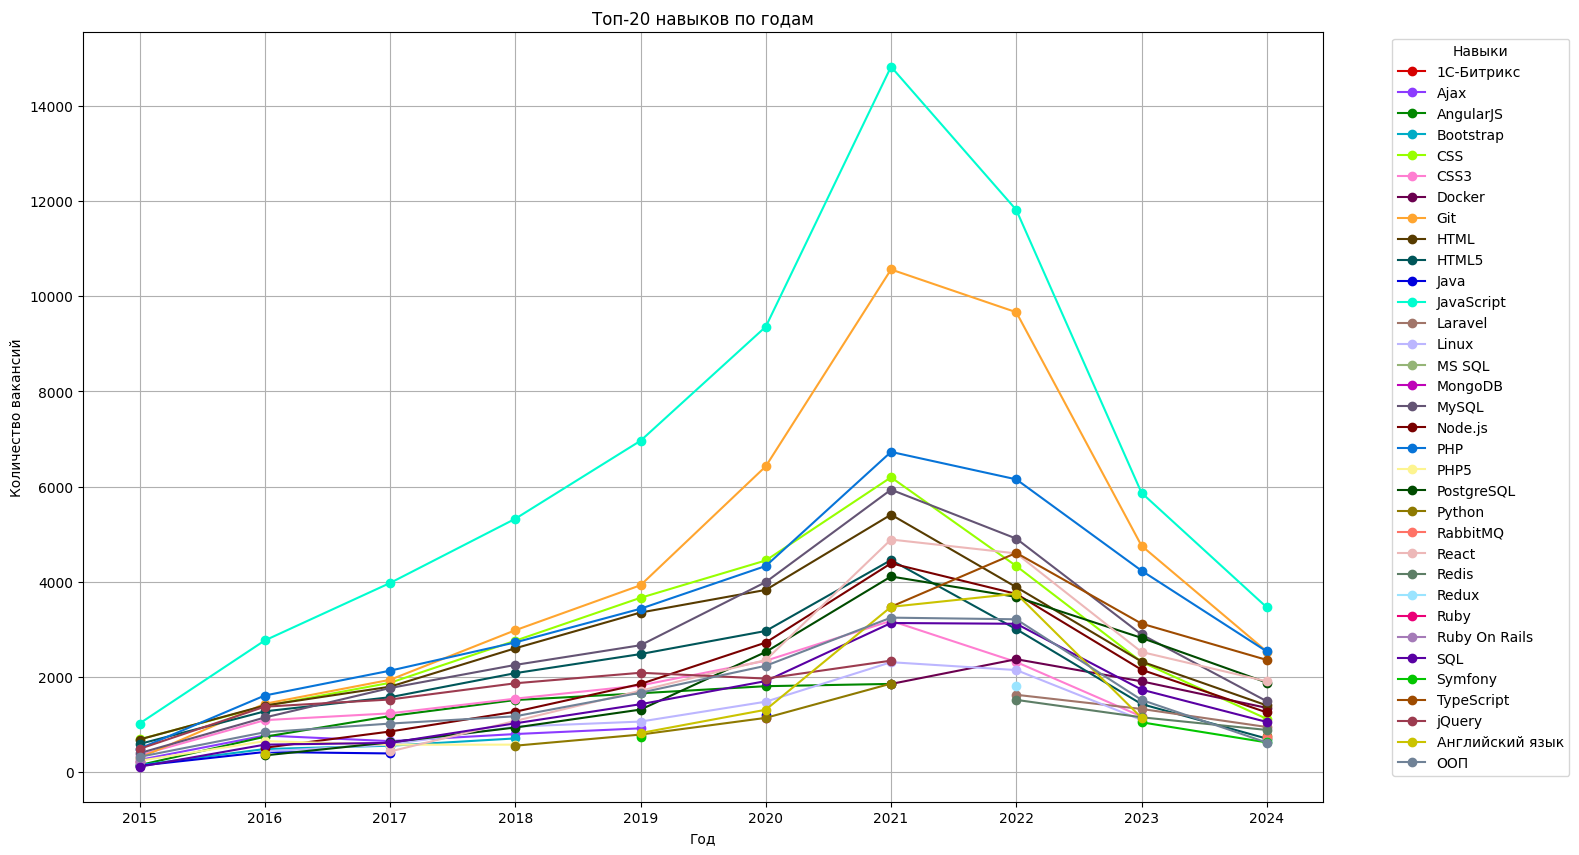

In [151]:
df['key_skills_splitted'] = df['key_skills'].str.split('\n')
exploded_df = df.explode('key_skills_splitted')
skill_counts = exploded_df.groupby(['year', 'key_skills_splitted']).size().unstack(fill_value=0)
top_20_skills = skill_counts.apply(lambda x: x.nlargest(20), axis=1)


palette = sns.color_palette(cc.glasbey, n_colors=len(top_20_skills.columns))
# palette = plt.cm.tab20(range(20))

plt.figure(figsize=(16, 10))
for i, skill in enumerate(top_20_skills.columns):
    plt.plot(top_20_skills.index, top_20_skills[skill], marker='o', label=skill, color=palette[i])
plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.title('Топ-20 навыков по годам')
plt.legend(title='Навыки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [152]:
top_20_skills.to_dict()

{'1С-Битрикс': {'2015': 132.0,
  '2016': nan,
  '2017': nan,
  '2018': nan,
  '2019': nan,
  '2020': nan,
  '2021': nan,
  '2022': nan,
  '2023': nan,
  '2024': nan},
 'Ajax': {'2015': 255.0,
  '2016': 768.0,
  '2017': 650.0,
  '2018': 799.0,
  '2019': 919.0,
  '2020': nan,
  '2021': nan,
  '2022': nan,
  '2023': nan,
  '2024': nan},
 'AngularJS': {'2015': 146.0,
  '2016': 742.0,
  '2017': 1176.0,
  '2018': 1514.0,
  '2019': 1656.0,
  '2020': 1805.0,
  '2021': 1853.0,
  '2022': nan,
  '2023': nan,
  '2024': nan},
 'Bootstrap': {'2015': 145.0,
  '2016': 484.0,
  '2017': 554.0,
  '2018': 707.0,
  '2019': nan,
  '2020': nan,
  '2021': nan,
  '2022': nan,
  '2023': nan,
  '2024': nan},
 'CSS': {'2015': 687.0,
  '2016': 1388.0,
  '2017': 1876.0,
  '2018': 2761.0,
  '2019': 3663.0,
  '2020': 4448.0,
  '2021': 6196.0,
  '2022': 4331.0,
  '2023': 2315.0,
  '2024': 1118.0},
 'CSS3': {'2015': 354.0,
  '2016': 1091.0,
  '2017': 1234.0,
  '2018': 1543.0,
  '2019': 1821.0,
  '2020': 2340.0,
  '2021

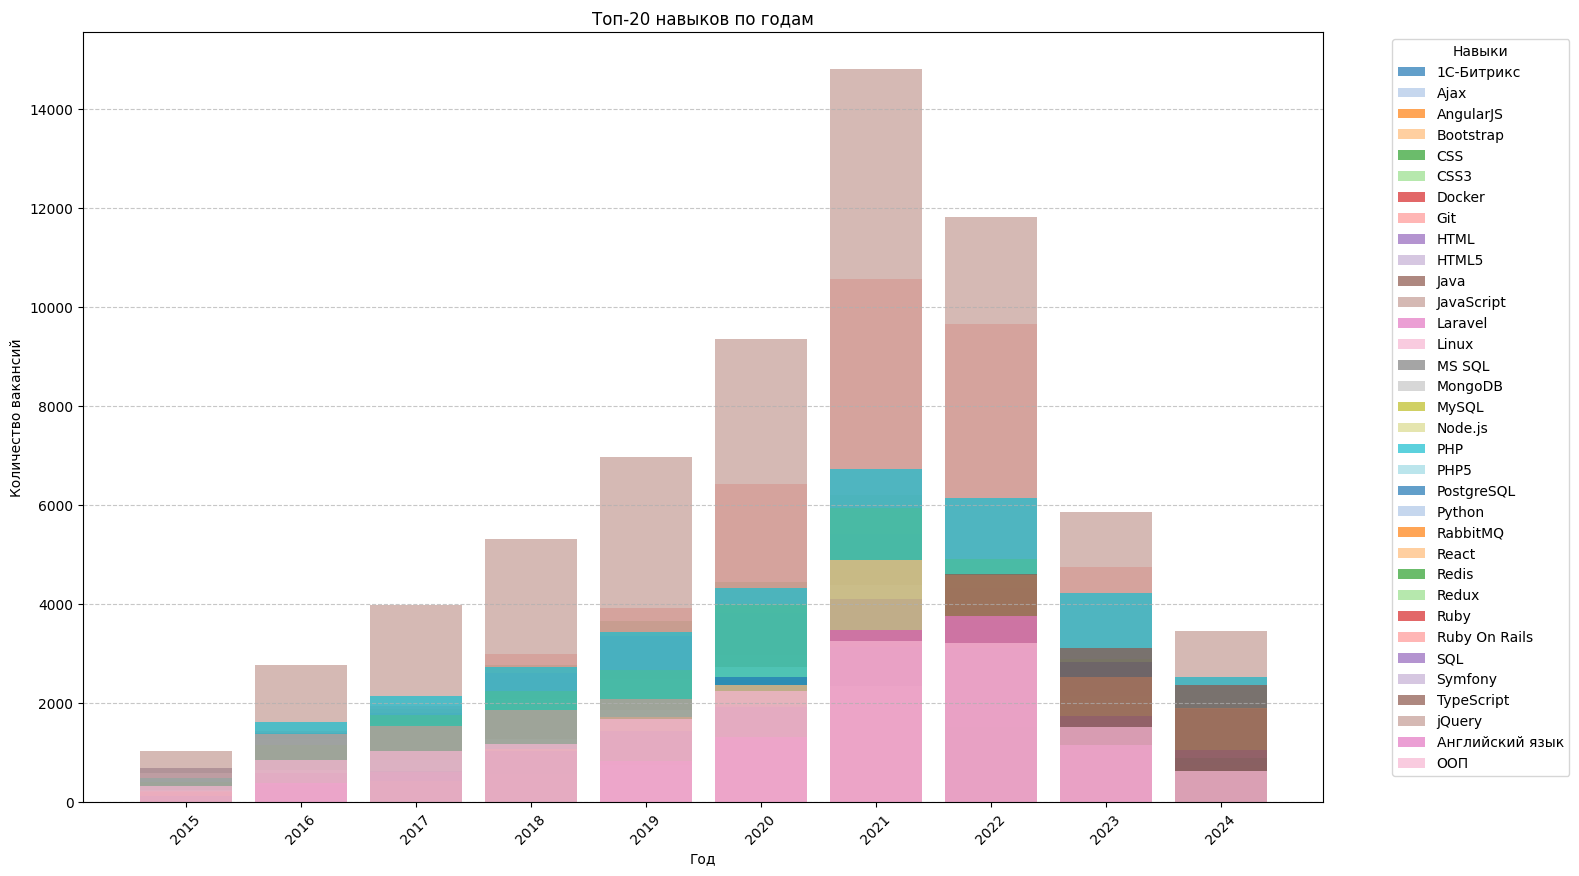

In [154]:
colors = plt.cm.tab20(range(20)) 

plt.figure(figsize=(16, 10))
for i, skill in enumerate(top_20_skills.columns):
    plt.bar(top_20_skills.index, top_20_skills[skill], label=skill, color=colors[i % 20], alpha=0.7)

plt.xlabel('Год')
plt.ylabel('Количество вакансий')
plt.title('Топ-20 навыков по годам')
plt.legend(title='Навыки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# <b>Страница «Востребованность»</b>